In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/dataset_transactions.csv'  # Укажите путь к файлу
data = pd.read_csv(file_path)
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   id  transaction_id             ip  device_id device_type  tran_code   mcc  \
0   0         1157921    91.107.0.90      982.0   prtbl trm         30  7103   
1   1         1595205   37.0.127.150     1033.0    port_trm         30  2031   
2   2         1656884  185.233.0.240       96.0         atm         25  4629   
3   3         1673909    91.107.0.90      982.0   prtbl trm         30  4629   
4   4         1689203   188.43.0.135     1413.0         ATM         10  5840   

   client_id card_type  pin_inc_count card_status expiration_date  \
0  969838140     DEBIT              0      active      2030-06-10   
1  969838140     DEBIT              0      active      2030-06-10   
2  969838140     DEBIT              0      active      2030-06-10   
3  969838140     DEBIT              0      active      2030-06-10   
4  969838140     DEBIT              0      ac

In [ ]:
# Проверяем на пропущенные значения
print("Пропущенные значения:\n", data.isnull().sum())
print(" ")

# Удаляем дубликаты
data = data.drop_duplicates()
print(" ")

# Преобразуем столбцы datetime и expiration_date в формат datetime
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
data['expiration_date'] = pd.to_datetime(data['expiration_date'], errors='coerce')
print(" ")

# Проверка данных после преобразования
print(data.info())

Пропущенные значения:
 id                 0
transaction_id     0
ip                 0
device_id          0
device_type        0
tran_code          0
mcc                0
client_id          0
card_type          0
pin_inc_count      0
card_status        0
expiration_date    0
datetime           0
sum                0
oper_type          0
balance            0
dtype: int64
 
 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53079 entries, 0 to 53078
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               53079 non-null  int64         
 1   transaction_id   53079 non-null  int64         
 2   ip               53079 non-null  object        
 3   device_id        53079 non-null  float64       
 4   device_type      53079 non-null  object        
 5   tran_code        53079 non-null  int64         
 6   mcc              53079 non-null  int64         
 7   client_id        53079 non-null

In [ ]:
# Добавляем временные признаки
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek
data['month'] = data['datetime'].dt.month

# Выводим первые строки с новыми признаками
print(data[['datetime', 'hour', 'day_of_week', 'month']].head())

             datetime  hour  day_of_week  month
0 2022-03-09 09:56:51     9            2      3
1 2022-03-10 09:38:45     9            3      3
2 2022-03-21 23:29:57    23            0      3
3 2022-03-24 02:18:28     2            3      3
4 2022-07-07 09:22:18     9            3      7


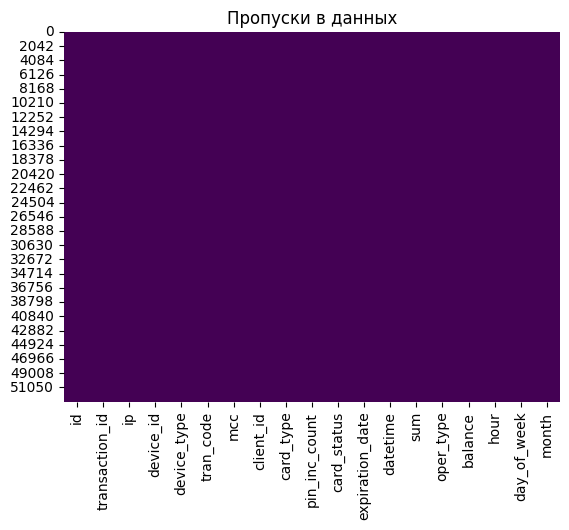

In [ ]:
# Визуализация пропущенных данных
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Пропуски в данных")
plt.show()

                 id  transaction_id     device_id     tran_code           mcc  \
count  53079.000000    5.307900e+04  53079.000000  53079.000000  53079.000000   
mean   26539.000000    5.516405e+06    753.008026    125.476949   5505.105164   
min        0.000000    1.000067e+06     10.000000     -1.000000   1001.000000   
25%    13269.500000    3.215850e+06    384.000000     10.000000   3314.000000   
50%    26539.000000    5.493855e+06    739.000000     25.000000   5482.000000   
75%    39808.500000    7.793275e+06   1120.000000     30.000000   7750.000000   
max    53078.000000    9.999941e+06   1495.000000    991.000000   9998.000000   
std    15322.731806    2.639071e+06    425.396994    187.653405   2584.121275   

          client_id  pin_inc_count                expiration_date  \
count  5.307900e+04   53079.000000                          53079   
mean   5.290013e+08       0.147441  2027-12-17 04:54:26.105239296   
min    1.016484e+08       0.000000            2024-11-29 00:00:

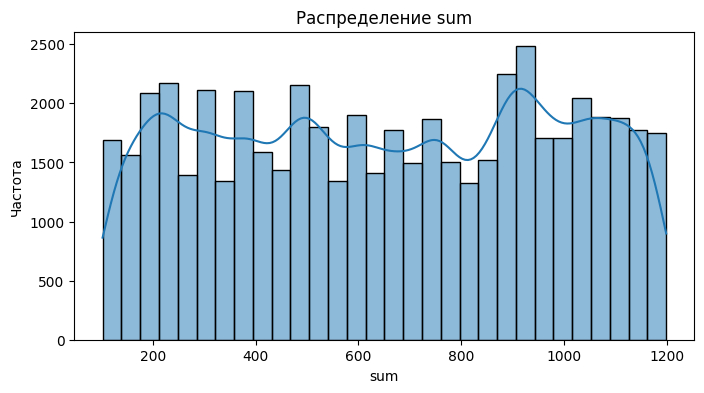

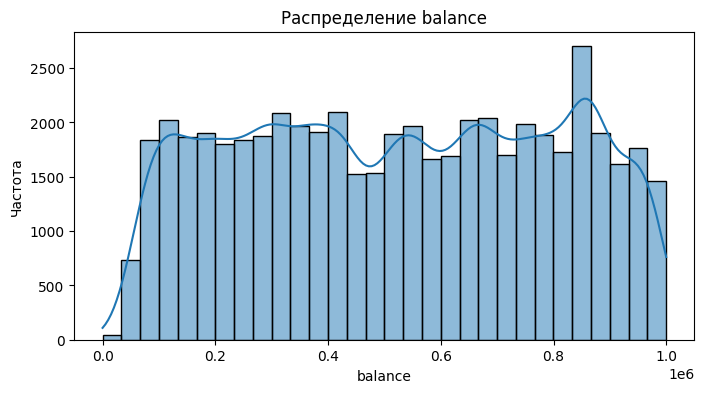

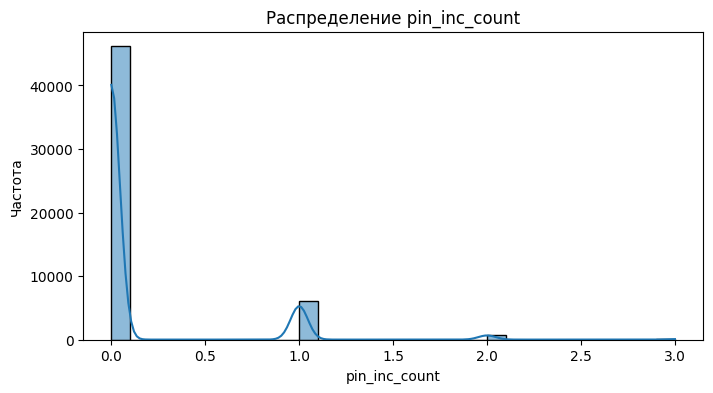

In [ ]:
# Основная статистика
print(data.describe())

# Построим распределения для ключевых числовых переменных
numerical_cols = ['sum', 'balance', 'pin_inc_count']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

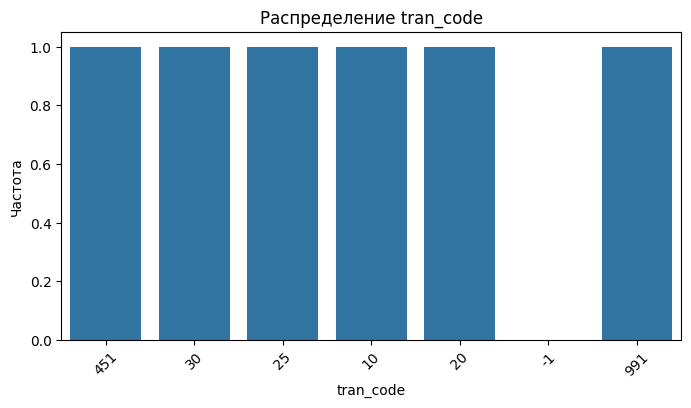

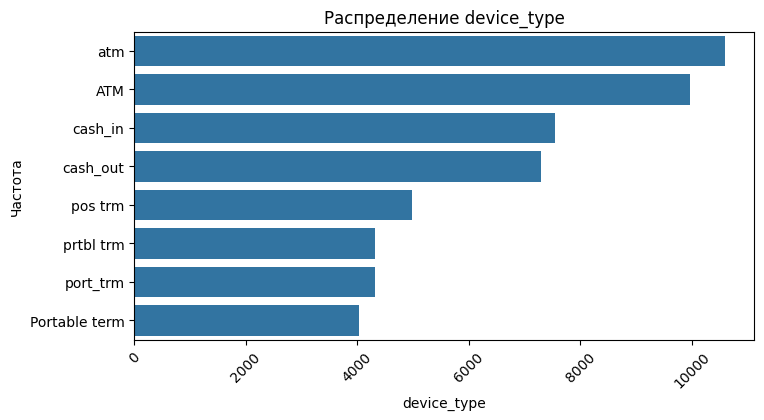

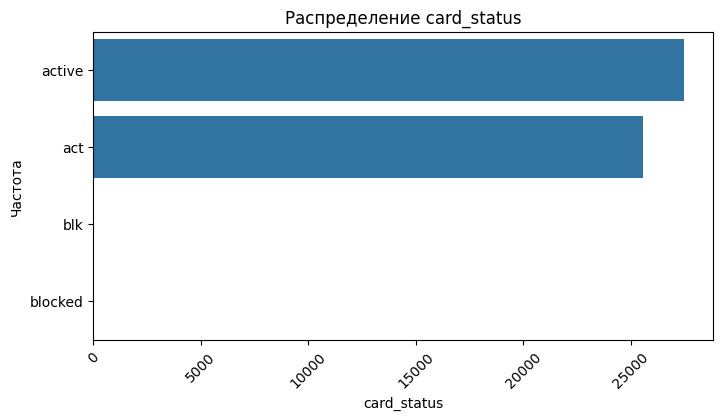

In [ ]:
# Анализ категориальных данных
categorical_cols = ['tran_code', 'device_type', 'card_status']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data[col], order=data[col].value_counts().index)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.show()

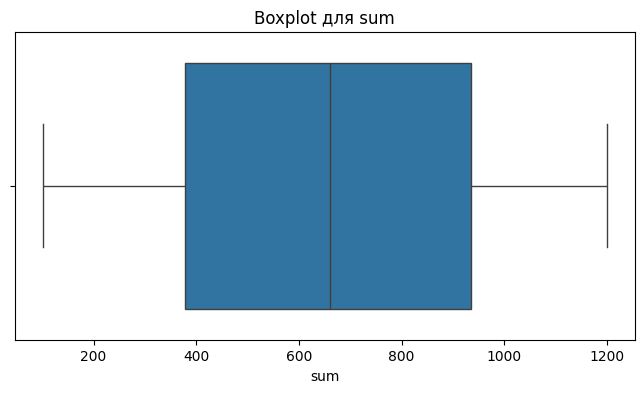

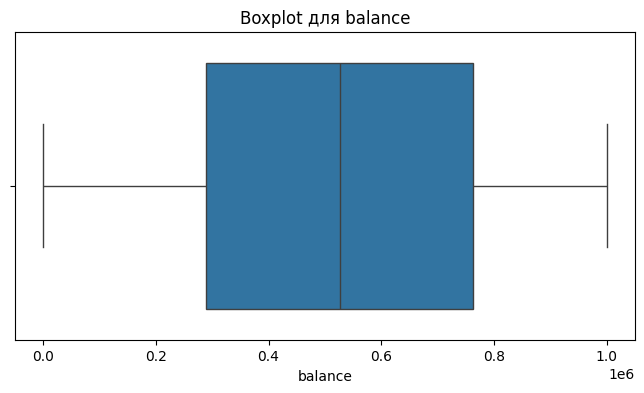

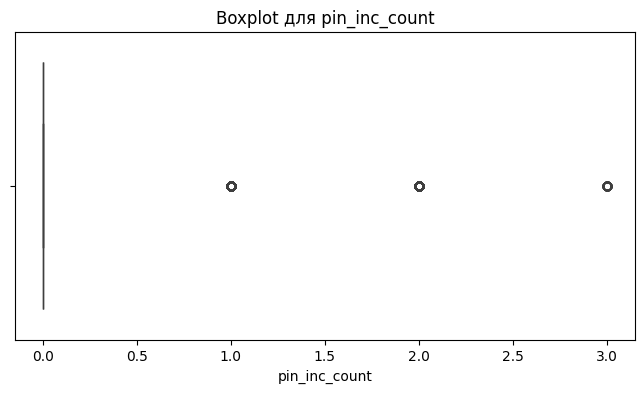

In [ ]:
#Выбросы с помощью даграммы размаха
# Построим boxplot для числовых данных
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot для {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
#Для анализа аномалий создадим несколько новых признаков:

#"days_to_expiration" — дни до окончания срока действия карты.
#"time_difference" — разница во времени между транзакциями одного клиента.

# Дни до окончания срока действия карты
data['days_to_expiration'] = (data['expiration_date'] - data['datetime']).dt.days

# Разница во времени между транзакциями одного клиента
data = data.sort_values(by=['client_id', 'datetime'])  # Сортировка по клиенту и времени
data['time_difference'] = data.groupby('client_id')['datetime'].diff().dt.total_seconds()

# Просмотр новых признаков
print(data[['client_id', 'datetime', 'days_to_expiration', 'time_difference']].head())

      client_id            datetime  days_to_expiration  time_difference
6351  101648380 2022-02-09 17:50:08                3066              NaN
6352  101648380 2022-02-21 19:39:05                3054        1043337.0
6353  101648380 2022-03-15 04:35:03                3032        1846558.0
6354  101648380 2022-03-26 19:32:45                3021        1004262.0
6355  101648380 2022-04-16 02:54:10                3000        1754485.0


In [ ]:
#Аномалии выбросов
# Выбросы для суммы транзакции
sum_threshold = data['sum'].quantile(0.99)  # 99-й процентиль
balance_threshold = data['balance'].quantile(0.99)  # 99-й процентиль

# Транзакции с выбросами
outliers_sum = data[data['sum'] > sum_threshold]
outliers_balance = data[data['balance'] > balance_threshold]

# Выводим результаты
print(f'Выбросы по сумме транзакции:\n{outliers_sum}')
print(f'Выбросы по балансу карты:\n{outliers_balance}')

Выбросы по сумме транзакции:
          id  transaction_id             ip  device_id    device_type  \
628      628         1088930  194.156.0.180       35.0       cash_out   
629      629         1173111    37.0.124.15      720.0      prtbl trm   
630      630         1174080    77.242.0.90      278.0        cash_in   
631      631         1434795   188.0.169.15      468.0        pos trm   
632      632         1628201   188.191.0.75     1144.0       cash_out   
...      ...             ...            ...        ...            ...   
16620  16620         9433948     46.0.9.210     1336.0       cash_out   
16621  16621         9537182      46.0.9.45     1320.0        pos trm   
16622  16622         9950874   88.210.0.120      350.0            atm   
16623  16623         9993578    128.0.82.60      614.0  Portable term   
52457  52457         9993579   188.0.162.75      494.0            atm   

       tran_code   mcc  client_id card_type  pin_inc_count  ...  \
628           20  9594  168

In [ ]:
#Аномалии по времени (время между транзакциями)
# Установим порог для быстрого времени между транзакциями
time_threshold = 60  # 60 секунд

# Транзакции с аномально быстрым временем
fast_transactions = data[data['time_difference'] < time_threshold]

# Выводим результаты
print(f'Аномальные транзакции (быстрое время между транзакциями):\n{fast_transactions}')

Аномальные транзакции (быстрое время между транзакциями):
          id  transaction_id             ip  device_id device_type  tran_code  \
52275  52275         9971566  193.0.149.210     1158.0         atm        451   
53022  53022         9993958    128.0.81.30     1290.0         atm        451   
52409  52409         9972544    178.44.0.90     1293.0         atm        451   
53061  53061         9685753    85.21.0.105      272.0         atm        451   
52506  52506         9901631     2.94.0.240     1042.0         atm         30   
...      ...             ...            ...        ...         ...        ...   
52190  52190         9492690    85.21.0.105      272.0         atm         -1   
52548  52548         9987291     2.94.0.240     1042.0         atm         10   
52294  52294         9843165   83.222.0.180      407.0         atm        451   
53044  53044         9959210   188.0.175.30     1432.0         atm         -1   
52800  52800         9964964   31.204.0.225      93

In [ ]:
#Аномалии по геолокации
# Проверим количество уникальных IP-адресов для каждого клиента
ip_count_per_client = data.groupby('client_id')['ip'].nunique()

# Установим порог аномалии (например, если у клиента больше 5 уникальных IP за день)
anomalous_clients = ip_count_per_client[ip_count_per_client > 5]

print(f'Аномальные клиенты по IP-адресам:\n{anomalous_clients}')

Аномальные клиенты по IP-адресам:
client_id
101648380    20
101814879    24
102589938    27
105878057    29
106476302    21
             ..
991618345    22
992042996    23
997093996    19
998717557    25
999660534    27
Name: ip, Length: 992, dtype: int64


In [ ]:
# Поведение клиента
# Применяем порог для количества ошибок PIN
pin_error_threshold = 2  # Например, больше 2 ошибок

# Транзакции с аномальными ошибками PIN
anomalous_pin_errors = data[data['pin_inc_count'] > pin_error_threshold]

print(f'Транзакции с аномальными ошибками PIN:\n{anomalous_pin_errors}')

Транзакции с аномальными ошибками PIN:
          id  transaction_id             ip  device_id    device_type  \
24882  24882         9201365   128.0.24.150      894.0        pos trm   
47342  47342         7344973    185.17.0.90     1052.0            atm   
27367  27367         9354274     46.0.0.120      663.0      prtbl trm   
8778    8778         7413753   46.0.143.135      822.0  Portable term   
627      627         4559799     46.0.2.180      194.0        cash_in   
...      ...             ...            ...        ...            ...   
4001    4001         6047152     46.0.143.0      810.0      prtbl trm   
26985  26985         2892282  194.0.162.195      755.0        pos trm   
10919  10919         8222932   37.0.123.195      334.0            ATM   
25201  25201         6277887  193.0.151.165       65.0        pos trm   
24614  24614         1641507    5.189.0.210      874.0  Portable term   

       tran_code   mcc  client_id card_type  pin_inc_count  ...  \
24882         -1 

In [ ]:
from sklearn.ensemble import IsolationForest

# Проверим наличие пропусков в используемых признаках
data[features].isna().sum()

# Заполним пропуски (например, заменим на медиану)
data[features] = data[features].fillna(data[features].median())

# Теперь применим Isolation Forest
model = IsolationForest(contamination=0.05)  # 5% данных считаем аномальными
data['anomaly'] = model.fit_predict(data[features])

# Фильтруем аномальные транзакции
anomalous_transactions = data[data['anomaly'] == -1]

print(f'Аномальные транзакции по методу Isolation Forest:\n{anomalous_transactions}')

Аномальные транзакции по методу Isolation Forest:
          id  transaction_id            ip  device_id    device_type  \
6372    6372         5052276   193.31.0.90      594.0            ATM   
48881  48881         1863817  95.167.0.225      218.0            ATM   
48897  48897         3022920   31.134.0.15     1117.0  Portable term   
48906  48906         4587202   31.134.0.15     1117.0  Portable term   
48922  48922         7245640  195.161.0.60     1167.0  Portable term   
...      ...             ...           ...        ...            ...   
50158  50158         6892006    37.0.124.0      719.0       port_trm   
36282  36282         1833016   95.106.0.45      547.0       port_trm   
36306  36306         5704792    46.173.0.0      487.0      prtbl trm   
36310  36310         6151758  188.0.169.60      471.0            atm   
36331  36331         9300162  85.140.0.210     1267.0       cash_out   

       tran_code   mcc  client_id card_type  pin_inc_count  ...  \
6372          -1  

In [ ]:
# Пытаемся найти транзакции с одинаковыми суммами, кодами операций и типами, но с разными IP и устройствами
suspicious_transactions = data[
    (data['device_type'].isin(['port_trm', 'ATM']))  # Транзакции с портативного терминала и банкомата
]

# Группируем по client_id, datetime, и проверяем, есть ли транзакции с разными IP и устройствами
suspicious_group = suspicious_transactions.groupby(['client_id', 'tran_code', 'oper_type', 'sum']).filter(
    lambda group: group['ip'].nunique() > 1 and group['device_id'].nunique() > 1
)

print(f'Подозрительные транзакции:\n{suspicious_group}')


Подозрительные транзакции:
          id  transaction_id             ip  device_id device_type  tran_code  \
6359    6359         2214005    193.31.0.90      594.0         ATM         -1   
6360    6360         2256247  188.244.0.240     1470.0    port_trm         30   
6371    6371         4922857  188.244.0.240     1470.0    port_trm         -1   
6376    6376         5872795     151.0.0.75       18.0    port_trm        451   
6378    6378         6192670    193.31.0.90      594.0         ATM         30   
...      ...             ...            ...        ...         ...        ...   
12320  12320         9131154  79.104.60.195      441.0    port_trm         25   
1891    1891         2895472    195.58.0.60     1429.0         ATM         10   
1913    1913         6529371   46.0.176.165      129.0         ATM         10   
42081  42081         2448514    95.167.0.90      207.0    port_trm         25   
42122  42122         8785959  78.24.158.144      943.0    port_trm         25   



In [ ]:
# Для начала нужно проверить, чтобы datetime был в формате datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Рассмотрим транзакции с одинаковым client_id, tran_code, oper_type и sum
suspicious_balance_diff = data.groupby(['client_id', 'tran_code', 'oper_type', 'sum']).filter(
    lambda group: group['balance'].nunique() > 1
)

print(f'Транзакции с различным балансом:\n{suspicious_balance_diff}')

Транзакции с различным балансом:
          id  transaction_id             ip  device_id device_type  tran_code  \
6354    6354         1338602    195.58.0.15     1425.0         atm         10   
6358    6358         1968039     151.0.0.75       18.0    port_trm        451   
6359    6359         2214005    193.31.0.90      594.0         ATM         -1   
6360    6360         2256247  188.244.0.240     1470.0    port_trm         30   
6371    6371         4922857  188.244.0.240     1470.0    port_trm         -1   
...      ...             ...            ...        ...         ...        ...   
36320  36320         7817294   151.0.38.120      398.0         ATM         30   
36324  36324         8021896  194.0.162.210      757.0         ATM        451   
36326  36326         8516349     46.173.0.0      487.0   prtbl trm         30   
36332  36332         9964963   37.0.123.180      333.0     cash_in        451   
52800  52800         9964964   31.204.0.225      932.0         atm        45

In [ ]:
# Фильтрация транзакций с заблокированными картами, ошибочными операциями и количеством неудачных попыток ввода PIN = 3
suspicious_blocked_card_transactions = data[
    (data['card_status'] == 'blocked') &  # Карта заблокирована
    (data['oper_type'].isin(['err', 'err_code', 'bad'])) &  # Операции с ошибками
    (data['pin_inc_count'] == 3)  # Количество неверных попыток PIN = 3
]

# Группируем по клиенту и проверяем на одинаковые транзакции
suspicious_blocked_card_transactions_grouped = suspicious_blocked_card_transactions.groupby(['client_id', 'tran_code']).filter(
    lambda group: group['tran_code'].nunique() == 1  # Одинаковые tran_code
)

print(f'Подозрительные транзакции с заблокированных карт:\n{suspicious_blocked_card_transactions_grouped}')

Подозрительные транзакции с заблокированных карт:
          id  transaction_id              ip  device_id    device_type  \
27367  27367         9354274      46.0.0.120      663.0      prtbl trm   
627      627         4559799      46.0.2.180      194.0        cash_in   
13881  13881         3598179     46.0.54.195     1089.0            atm   
14381  14381         2456146     185.233.0.0       77.0       port_trm   
45415  45415         5164542     109.126.0.0      364.0       port_trm   
38748  38748         1112815    46.0.143.225      829.0  Portable term   
10396  10396         1427327     134.0.98.60      795.0       port_trm   
4365    4365         4348755   217.112.0.135     1482.0        pos trm   
16354  16354         5880599   185.173.0.195     1287.0  Portable term   
19086  19086         6489217    91.107.0.135      987.0  Portable term   
25661  25661         5589526   188.0.166.240     1316.0        pos trm   
935      935         5981674      46.8.0.225      785.0       

In [ ]:
# Преобразуем datetime в тип datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Фильтрация транзакций с заблокированными картами, ошибочными операциями и количеством неудачных попыток ввода PIN = 3
suspicious_blocked_card_transactions = data[
    (data['card_status'] == 'blocked') &  # Карта заблокирована
    (data['oper_type'].isin(['err', 'err_code', 'bad'])) &  # Операции с ошибками
    (data['pin_inc_count'] == 3)  # Количество неверных попыток PIN = 3
]

# Используем .loc[] для безопасного изменения данных
suspicious_blocked_card_transactions.loc[:, 'time_diff'] = suspicious_blocked_card_transactions.groupby(['client_id', 'tran_code'])['datetime'].diff().abs()
suspicious_blocked_card_transactions.loc[:, 'time_diff'] = suspicious_blocked_card_transactions['time_diff'].fillna(pd.Timedelta(seconds=0))

# Фильтруем транзакции с разницей по времени менее 5 минут
repeated_transactions = suspicious_blocked_card_transactions[suspicious_blocked_card_transactions['time_diff'] <= pd.Timedelta(minutes=5)]

# Проверяем, если на одной и той же заблокированной карте несколько различных ошибочных операций
suspicious_transactions_multiple_errors = suspicious_blocked_card_transactions.groupby(['client_id', 'tran_code']).filter(
    lambda group: group['oper_type'].nunique() > 1  # Разные типы ошибок на одной карте
)

# Объединяем оба улучшения (повторяющиеся транзакции и несколько разных ошибок на одной карте)
suspicious_transactions_combined = pd.concat([repeated_transactions, suspicious_transactions_multiple_errors]).drop_duplicates()

# Выводим подозрительные транзакции
print(f'Подозрительные транзакции с заблокированных карт (повторяющиеся и с разными ошибками):\n{suspicious_transactions_combined}')


Подозрительные транзакции с заблокированных карт (повторяющиеся и с разными ошибками):
          id  transaction_id              ip  device_id    device_type  \
27367  27367         9354274      46.0.0.120      663.0      prtbl trm   
627      627         4559799      46.0.2.180      194.0        cash_in   
13881  13881         3598179     46.0.54.195     1089.0            atm   
14381  14381         2456146     185.233.0.0       77.0       port_trm   
45415  45415         5164542     109.126.0.0      364.0       port_trm   
38748  38748         1112815    46.0.143.225      829.0  Portable term   
10396  10396         1427327     134.0.98.60      795.0       port_trm   
4365    4365         4348755   217.112.0.135     1482.0        pos trm   
16354  16354         5880599   185.173.0.195     1287.0  Portable term   
19086  19086         6489217    91.107.0.135      987.0  Portable term   
25661  25661         5589526   188.0.166.240     1316.0        pos trm   
935      935         5981

<ipython-input-35-306dc5c4980b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious_blocked_card_transactions.loc[:, 'time_diff'] = suspicious_blocked_card_transactions.groupby(['client_id', 'tran_code'])['datetime'].diff().abs()


<ipython-input-36-7d3e6727157d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=suspicious_blocked_card_transactions, x='device_type', palette='Set2')


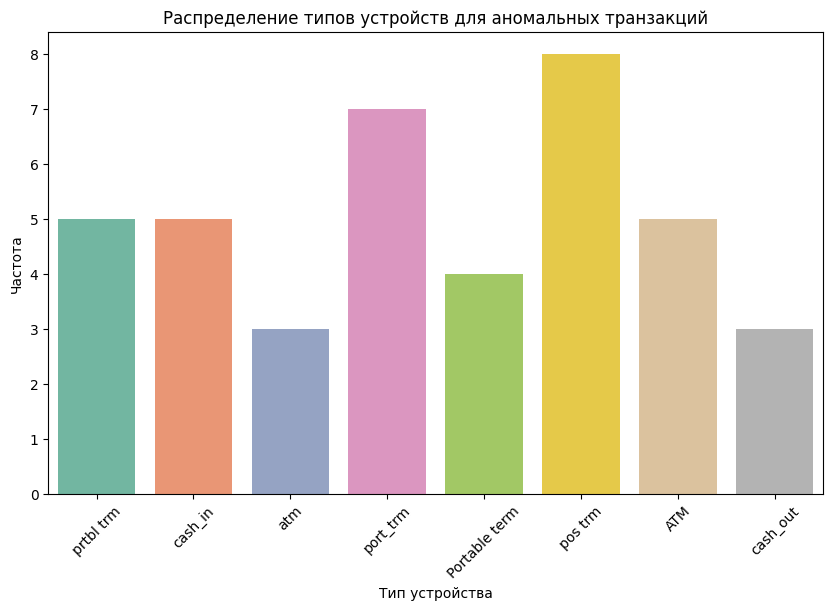

In [ ]:
#График распределения по типу устройства для аномальных транзакций
import matplotlib.pyplot as plt
import seaborn as sns

# График распределения по типу устройства
plt.figure(figsize=(10, 6))
sns.countplot(data=suspicious_blocked_card_transactions, x='device_type', palette='Set2')
plt.title('Распределение типов устройств для аномальных транзакций')
plt.xlabel('Тип устройства')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()


<ipython-input-37-db3818e3d55c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious_blocked_card_transactions['datetime'] = pd.to_datetime(suspicious_blocked_card_transactions['datetime'])


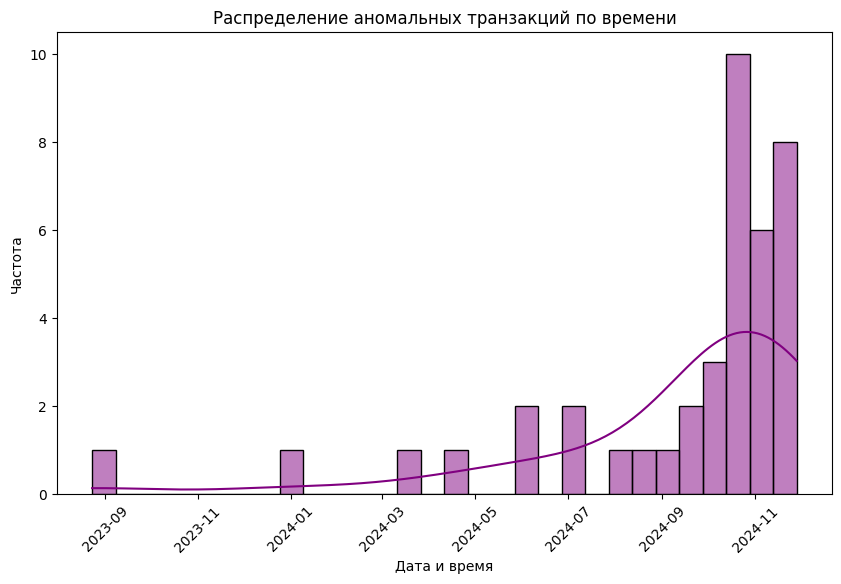

In [ ]:
#График временного распределения для аномальных транзакций
# Преобразуем datetime в pandas datetime формат, если это не сделано ранее
suspicious_blocked_card_transactions['datetime'] = pd.to_datetime(suspicious_blocked_card_transactions['datetime'])

# График количества транзакций по времени
plt.figure(figsize=(10, 6))
sns.histplot(suspicious_blocked_card_transactions['datetime'], bins=30, kde=True, color='purple')
plt.title('Распределение аномальных транзакций по времени')
plt.xlabel('Дата и время')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()


<ipython-input-38-6ff283590052>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ips.index, y=top_ips.values, palette='viridis')


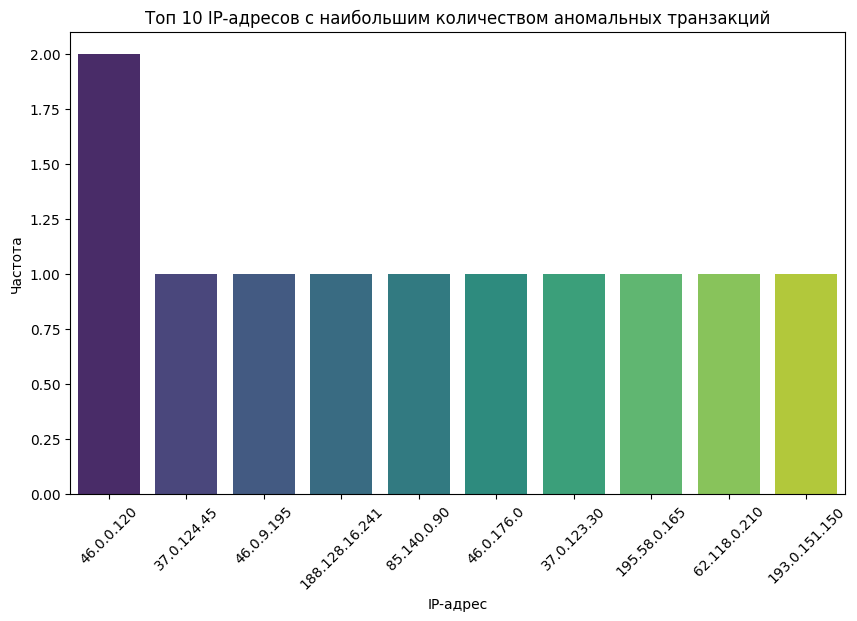

In [ ]:
#График распределения по IP-адресам
# Считаем количество транзакций для каждого IP
ip_counts = suspicious_blocked_card_transactions['ip'].value_counts()

# Отображаем топ 10 IP с наибольшим количеством транзакций
top_ips = ip_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ips.index, y=top_ips.values, palette='viridis')
plt.title('Топ 10 IP-адресов с наибольшим количеством аномальных транзакций')
plt.xlabel('IP-адрес')
plt.ylabel('Частота')
plt.xticks(rotation=45)
plt.show()


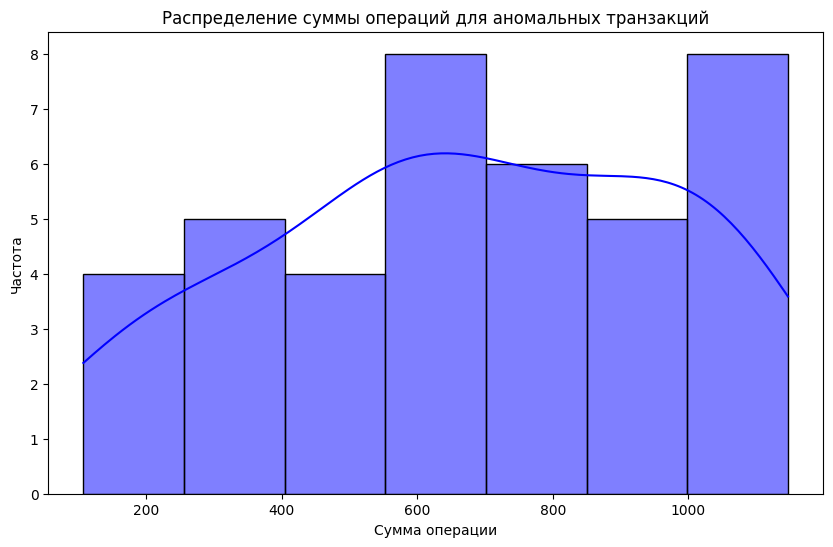

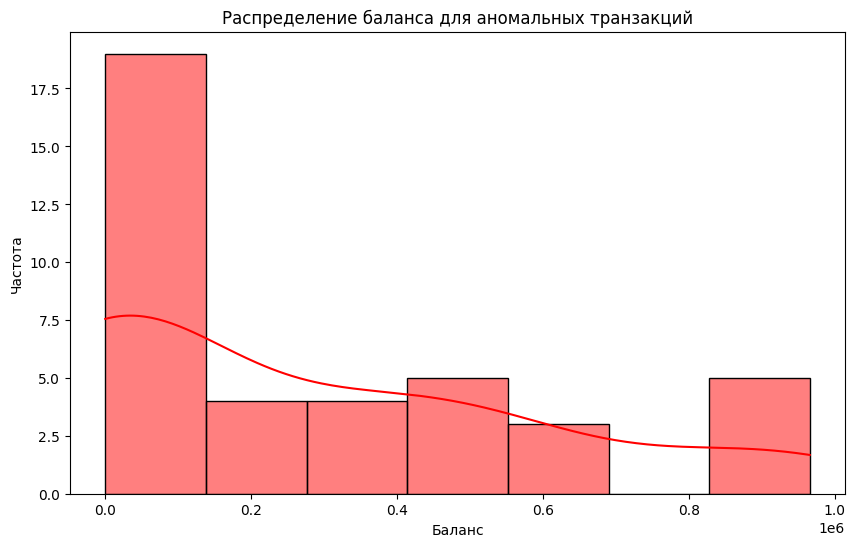

In [ ]:
#График распределения сумм операций и баланса
# График распределения сумм операций
plt.figure(figsize=(10, 6))
sns.histplot(suspicious_blocked_card_transactions['sum'], kde=True, color='blue')
plt.title('Распределение суммы операций для аномальных транзакций')
plt.xlabel('Сумма операции')
plt.ylabel('Частота')
plt.show()

# График распределения баланса
plt.figure(figsize=(10, 6))
sns.histplot(suspicious_blocked_card_transactions['balance'], kde=True, color='red')
plt.title('Распределение баланса для аномальных транзакций')
plt.xlabel('Баланс')
plt.ylabel('Частота')
plt.show()


<ipython-input-40-b63e9206c982>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=suspicious_blocked_card_transactions, x='pin_inc_count', palette='coolwarm')


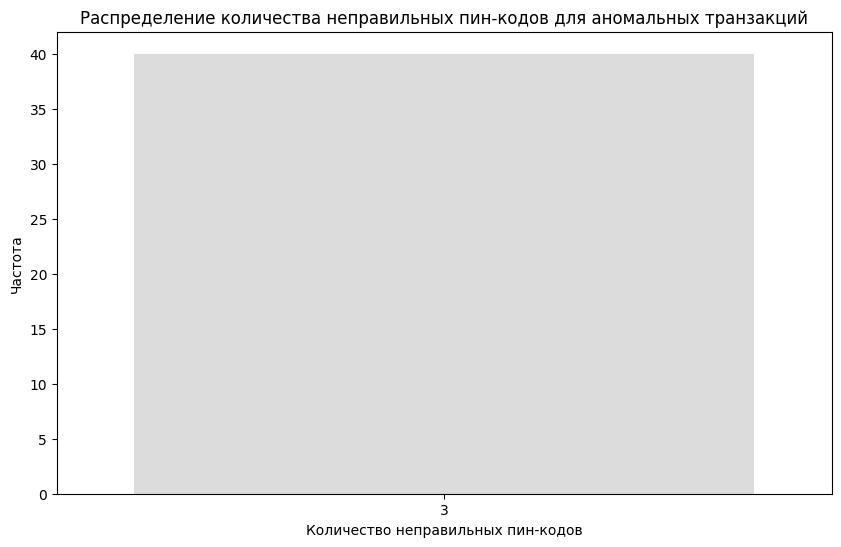

In [ ]:
#График количества неправильных пин-кодов для аномальных транзакций
# График распределения количества неправильных пин-кодов
plt.figure(figsize=(10, 6))
sns.countplot(data=suspicious_blocked_card_transactions, x='pin_inc_count', palette='coolwarm')
plt.title('Распределение количества неправильных пин-кодов для аномальных транзакций')
plt.xlabel('Количество неправильных пин-кодов')
plt.ylabel('Частота')
plt.show()


<ipython-input-43-63a8e932ae94>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=suspicious_balance_diff, x='balance', palette='coolwarm')


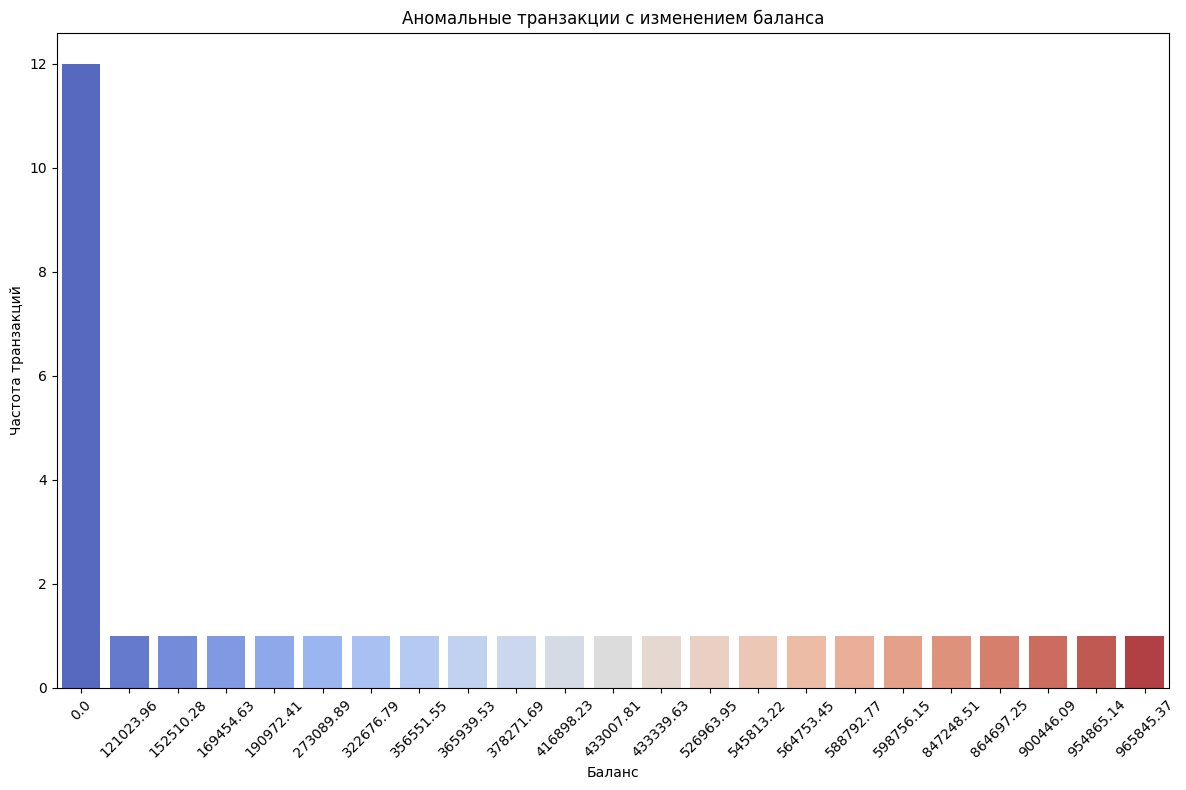

In [ ]:
#Аномальные транзакции с одинаковым балансом
suspicious_balance_diff = suspicious_blocked_card_transactions[suspicious_blocked_card_transactions['balance'] != suspicious_blocked_card_transactions['balance'].shift()]
plt.figure(figsize=(12, 8))
sns.countplot(data=suspicious_balance_diff, x='balance', palette='coolwarm')
plt.title('Аномальные транзакции с изменением баланса')
plt.xlabel('Баланс')
plt.ylabel('Частота транзакций')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

